# 10_Nonparametric_Kruskall-Wallis

## Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data.

In [1]:
def read_csv(file):
    import pandas as pd
    df = pd.read_csv(file)
    return df


In [2]:
path= "./BD/bd_exercises_curse.csv"

bd_data = read_csv(path)
bd_data.columns


Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

In [11]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    result = kruskal(*groups)

    print(f"Kruskal-Wallis test: {result.statistic}")
    print(f"p-value: {result.pvalue}")

    if result.pvalue < alpha:
        print("The diferences between groups are statistically significant.")
    else:
        print("No statiscally significant diferences between groups.")

In [12]:
#Se define la media de la temperatura
median_temp = bd_data["temp_c"].median()
#Se define una columna nueva que tiene el grupo al que pertenece
bd_data["temp_group"] = bd_data["temp_c"].apply(lambda x: "Baja" if x <= median_temp else "Alta")

In [13]:
#Se crean dos variables para agrupar el campo dic según su temperatura
dic_baja = bd_data[bd_data["temp_group"] == "Baja"]["dic_micromol_kg"]
dic_alta = bd_data[bd_data["temp_group"] == "Alta"]["dic_micromol_kg"]

In [15]:
import scikit_posthocs as sp

In [16]:
# Aplicar la prueba de Kruskal-Wallis
kruskal_wallis_test(dic_baja, dic_alta)

Kruskal-Wallis test: 2.195556166913502
p-value: 0.13840924338451996
No statiscally significant diferences between groups.


## Box plot

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\yurev\AppData\Local\Temp\ipykernel_19176\1110858842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bd_data, x='temp_group', y='dic_micromol_kg', palette=my_colors)


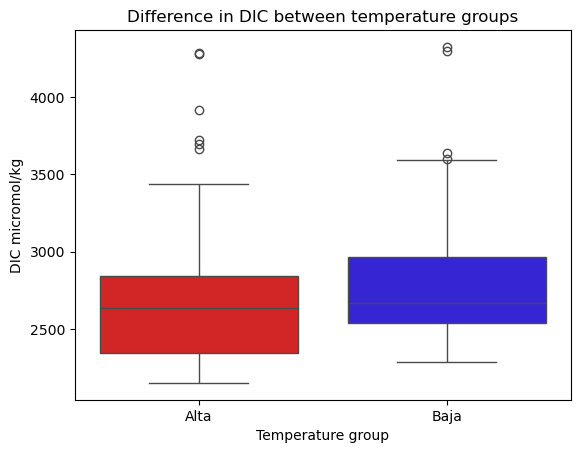

In [23]:
my_colors =["#ef0808", "#1f08ef"]

sns.boxplot(data=bd_data, x='temp_group', y='dic_micromol_kg', palette=my_colors)
plt.title('Difference in DIC between temperature groups')
plt.xlabel('Temperature group')
plt.ylabel('DIC micromol/kg')
plt.show()


### Se aplicó la prueba de Kruskal-Wallis para comparar los valores de DIC entre los dos grupos de temperatura. El resultado no fue estadísticamente significativo, por lo que no se encontraron diferencias entre los grupos. Por lo que no se aplicará la prueba post hoc de Dunn.